# JFK Taxi-out Linear Regression

Objective: Create Linear Regression Model  of  JFK Taxi-Out, using data scraped from an Academic Paper under Review by IEEE transportation covering Nov 2019- Jan 2020 (D Kansal, Kaggle dataset)

Value: At JFK airport Taxi-Out prediction is an important concept for calculating runway time and directly impacts the cost of  flights.

Reference – Kaggle page Flight Take Off Data - JFK Airport: https://www.kaggle.com/datasets/deepankurk/flight-take-off-data-jfk-airport/data



# 1. Import Libraries

In [68]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV,Lasso, LassoCV
from sklearn.model_selection import RepeatedKFold


# 2. Exploratory Data Analysis

#   2.1 Standard data review (view data, check for nulls, duplicates)

In [69]:
# read the dataset
flight_data = pd.read_csv("M1_final.csv")
# show the dataset transposed to examine columns
flight_data.T

,0,1,2,3,4,5,6,7,8,9,...,28810,28811,28812,28813,28814,28815,28816,28817,28818,28819
MONTH,11,11,11,11,11,11,11,11,11,11,...,1,1,1,1,1,1,1,1,1,1
DAY_OF_MONTH,1,1,1,1,1,1,1,1,1,1,...,31,31,31,31,31,31,31,31,31,31
DAY_OF_WEEK,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
OP_UNIQUE_CARRIER,B6,B6,B6,B6,DL,AA,AA,B6,B6,B6,...,B6,AA,B6,B6,B6,B6,AA,AS,B6,B6
TAIL_NUM,N828JB,N992JB,N959JB,N999JQ,N880DN,N983NN,N107NN,N274JB,N663JB,N283JB,...,N198JB,N111ZM,N273JB,N179JB,N279JB,N216JB,N104NN,N581AS,N957JB,N958JB
DEST,CHS,LAX,FLL,MCO,ATL,ORD,LAX,BUF,LGB,FLL,...,BOS,SFO,BUF,ROC,BTV,ORH,BOS,SEA,SJU,BQN
DEP_DELAY,-1,-7,40,-2,-4,-1,-1,-5,0,3,...,-2,75,-12,-11,-4,2,2,283,5,-1
CRS_ELAPSED_TIME,124,371,181,168,139,161,373,80,368,184,...,70,406,88,83,75,57,75,392,224,225
DISTANCE,636,2475,1069,944,760,740,2475,301,2465,1069,...,187,2586,301,264,266,150,187,2422,1598,1576
CRS_DEP_M,324,340,301,345,360,359,360,365,365,370,...,1349,1273,1370,1370,1375,1370,1390,1125,1417,1439


In [70]:
# checking for missing values
flight_data.isnull().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 2
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

2 null points in wind variable/feature - will review this if decide to use in model.

In [71]:
# information about dataset
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [72]:
# check for duplicate rows
duplic_check = flight_data.drop_duplicates()
duplic_check.info()
# same row number as main data set - no duplicates 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

No duplicate rows in dataset.

Dew point should be non- string as per kaggle data view. 





In [73]:
# make dew point integer
flight_data["Dew Point"] = flight_data["Dew Point"].astype(float)
flight_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  float64
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [74]:
# basic statistics of non-string columns
flight_data.describe().T

,count,mean,std,min,25%,50%,75%,max
MONTH,28820.0,7.894240,4.991723,1.0,1.00,11.00,12.00,12.00
DAY_OF_MONTH,28820.0,16.021096,8.750179,1.0,8.00,16.00,24.00,31.00
DAY_OF_WEEK,28820.0,4.008952,1.985230,1.0,2.00,4.00,6.00,7.00
DEP_DELAY,28820.0,6.374983,38.735144,-22.0,-6.00,-3.00,2.00,1276.00
CRS_ELAPSED_TIME,28820.0,225.288203,119.482417,57.0,124.00,188.00,365.00,697.00
DISTANCE,28820.0,1267.746079,889.343246,94.0,483.00,1029.00,2248.00,4983.00
CRS_DEP_M,28820.0,831.003851,299.398525,301.0,545.00,856.00,1095.00,1439.00
DEP_TIME_M,28820.0,828.934698,305.864103,1.0,542.00,854.00,1097.00,1440.00
CRS_ARR_M,28820.0,910.874289,345.411743,1.0,667.00,918.00,1193.00,1439.00
Temperature,28820.0,41.489833,8.043533,17.0,36.00,42.00,47.00,68.00


In [75]:
# Count and list unique values in each column to examine data varability, only if data type in each column is a string
for i in flight_data:
    data_type =  flight_data[i].dtype
    if data_type == "object":
        value_count = flight_data[i].value_counts()
        print("\n",value_count)


 OP_UNIQUE_CARRIER
B6    9589
DL    7680
9E    4485
AA    3595
AS    1111
MQ    1045
YX     914
OO     311
HA      90
Name: count, dtype: int64

 TAIL_NUM
N102NN    108
N103NN    103
N2002J    101
N2016J    100
N115NN     99
         ... 
N117HQ      1
N564AS      1
N904DE      1
N668AW      1
N197DN      1
Name: count, Length: 2092, dtype: int64

 DEST
LAX    2974
SFO    1678
BOS    1243
FLL    1008
MCO     947
       ... 
ABQ      58
PHL      48
RNO      47
EGE      44
JAC       5
Name: count, Length: 65, dtype: int64

 Wind
W       3273
NW      3173
NNW     2570
WSW     2567
N       2453
SW      2354
WNW     2145
S       1879
SSW     1632
NNE     1280
ENE     1124
E       1068
NE      1044
CALM     835
ESE      466
SE       345
SSE      315
VAR      295
Name: count, dtype: int64

 Condition
Mostly Cloudy            9124
Fair                     5038
Cloudy                   4992
Partly Cloudy            3209
Light Rain               1865
Mostly Cloudy / Windy    1442
Fair / Windy  

Reviewing the string data to see if would be worth making numeric to add to the model.  

1) Wind -shows wind direction in W,NW etc. To make continuous would depend on previaling wind. Already have wind gust and speed numeric data - can come back to this if they look to have a significat relationship
2) Condition shows weather/climate conditions. Could assign number to severity a bit subjective, would need domain knowledge input to correctly assign. Most frequent occurences appear to be milder conditions and less frequent more severe conditions - will make new column weather frequencies.
3) DEST Destination will be part convered by Distance variable/feature. 
4) Tail_num and Op_unique carrier refer to airlines and are likely not to have as much impact as the numeric data so won't attempt to categorise numerically. Distance variable/feature will cover this partially. 


In [76]:
# new column to data frame - weather condition counts
flight_data["Condition_count"] = flight_data.groupby(["Condition"])["Condition"].transform("count")
#check
flight_data.T

,0,1,2,3,4,5,6,7,8,9,...,28810,28811,28812,28813,28814,28815,28816,28817,28818,28819
MONTH,11,11,11,11,11,11,11,11,11,11,...,1,1,1,1,1,1,1,1,1,1
DAY_OF_MONTH,1,1,1,1,1,1,1,1,1,1,...,31,31,31,31,31,31,31,31,31,31
DAY_OF_WEEK,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
OP_UNIQUE_CARRIER,B6,B6,B6,B6,DL,AA,AA,B6,B6,B6,...,B6,AA,B6,B6,B6,B6,AA,AS,B6,B6
TAIL_NUM,N828JB,N992JB,N959JB,N999JQ,N880DN,N983NN,N107NN,N274JB,N663JB,N283JB,...,N198JB,N111ZM,N273JB,N179JB,N279JB,N216JB,N104NN,N581AS,N957JB,N958JB
DEST,CHS,LAX,FLL,MCO,ATL,ORD,LAX,BUF,LGB,FLL,...,BOS,SFO,BUF,ROC,BTV,ORH,BOS,SEA,SJU,BQN
DEP_DELAY,-1,-7,40,-2,-4,-1,-1,-5,0,3,...,-2,75,-12,-11,-4,2,2,283,5,-1
CRS_ELAPSED_TIME,124,371,181,168,139,161,373,80,368,184,...,70,406,88,83,75,57,75,392,224,225
DISTANCE,636,2475,1069,944,760,740,2475,301,2465,1069,...,187,2586,301,264,266,150,187,2422,1598,1576
CRS_DEP_M,324,340,301,345,360,359,360,365,365,370,...,1349,1273,1370,1370,1375,1370,1390,1125,1417,1439


Westher data variables self-explanatory. Flight data variable definition taken from Kaggle and reviewed below.

These 3 variables are 24 hours represented in minutes - max is 1440 (24h x 60 mins)
1) CRS_DEP_M Scheduled Departure Time. 
2) DEP_TIME_M Actual Departure TIme(Gate checkout of the flight not the take off time) - Timeline is sorted based on this data (refer to table below)
3) CRS_ARR_M Scheduled Arrival Time

Table extract

0) Index 	    0	1	2
1) CRS_DEP_M	324	340	301
2) DEP_TIME_M	323	333	341
3) CRS_ARR_M	448	531	482

- DEP_DELAY Departure delay of the flight - is calculation of DEP_TIME_M Actual Departure TIme(Gate checkout of the flight not the take off time)subtract CRS_DEP_M Scheduled Departure Time.

- CRS_ELAPSED_TIME Scheduled journey time of the flight. If in the same time zone is the same as CRS_ARR_M Scheduled Arrival Time - CRS_DEP_M Scheduled Departure Time. For example Charlestown South Carolina CHS matches (index 0 448-324 = 124) but LAX (index 1 531-340 = 191 .  .. . 191 + 180[3hours time diff] = 371)

- CRS_ARR_M Scheduled Arrival Time concerns another airport and should not be factored into any JFK Taxi-out model

- CRS_ELAPSED_TIME Scheduled journey time of the flight and DISTANCE Distance of the flight at a glance logically correlate - longer distance, longer flight time

- TAXI_OUT Taxi-out time - Runway time - Target variable

- sch_arr = Number of flights scheduled for arrival. Unknow number of flights that actually arrived at the time of flight
- sch_dep = Number of flights scheduled for departure. Assume this is based on DEP_TIME_M Actual Departure TIme as timeline is sorted based on this data.
Data looks the same for all flights within an hour block e.g. 06:00-06:59 = 360-419  (refer to next 2 cells)

Departure time description table - Earliest scheduled departure in this dataset 301/05:01

0)              count,      mean,    std,     min, 25%,    50%,    75%,     max
1) CRS_DEP_M	28820.0  ,  831.003851  ,   299.398525  ,  301.0,    545.00  , 856.00  , 1095.00  ,  1439.00



- Other features pertain to day, month etc. Time of the year is limited (Nov 2019- Jan 2020) - will include holidays and likely wintry conditions. Ideally model would be date independent so will likely not include in model unless there is a strong correlation



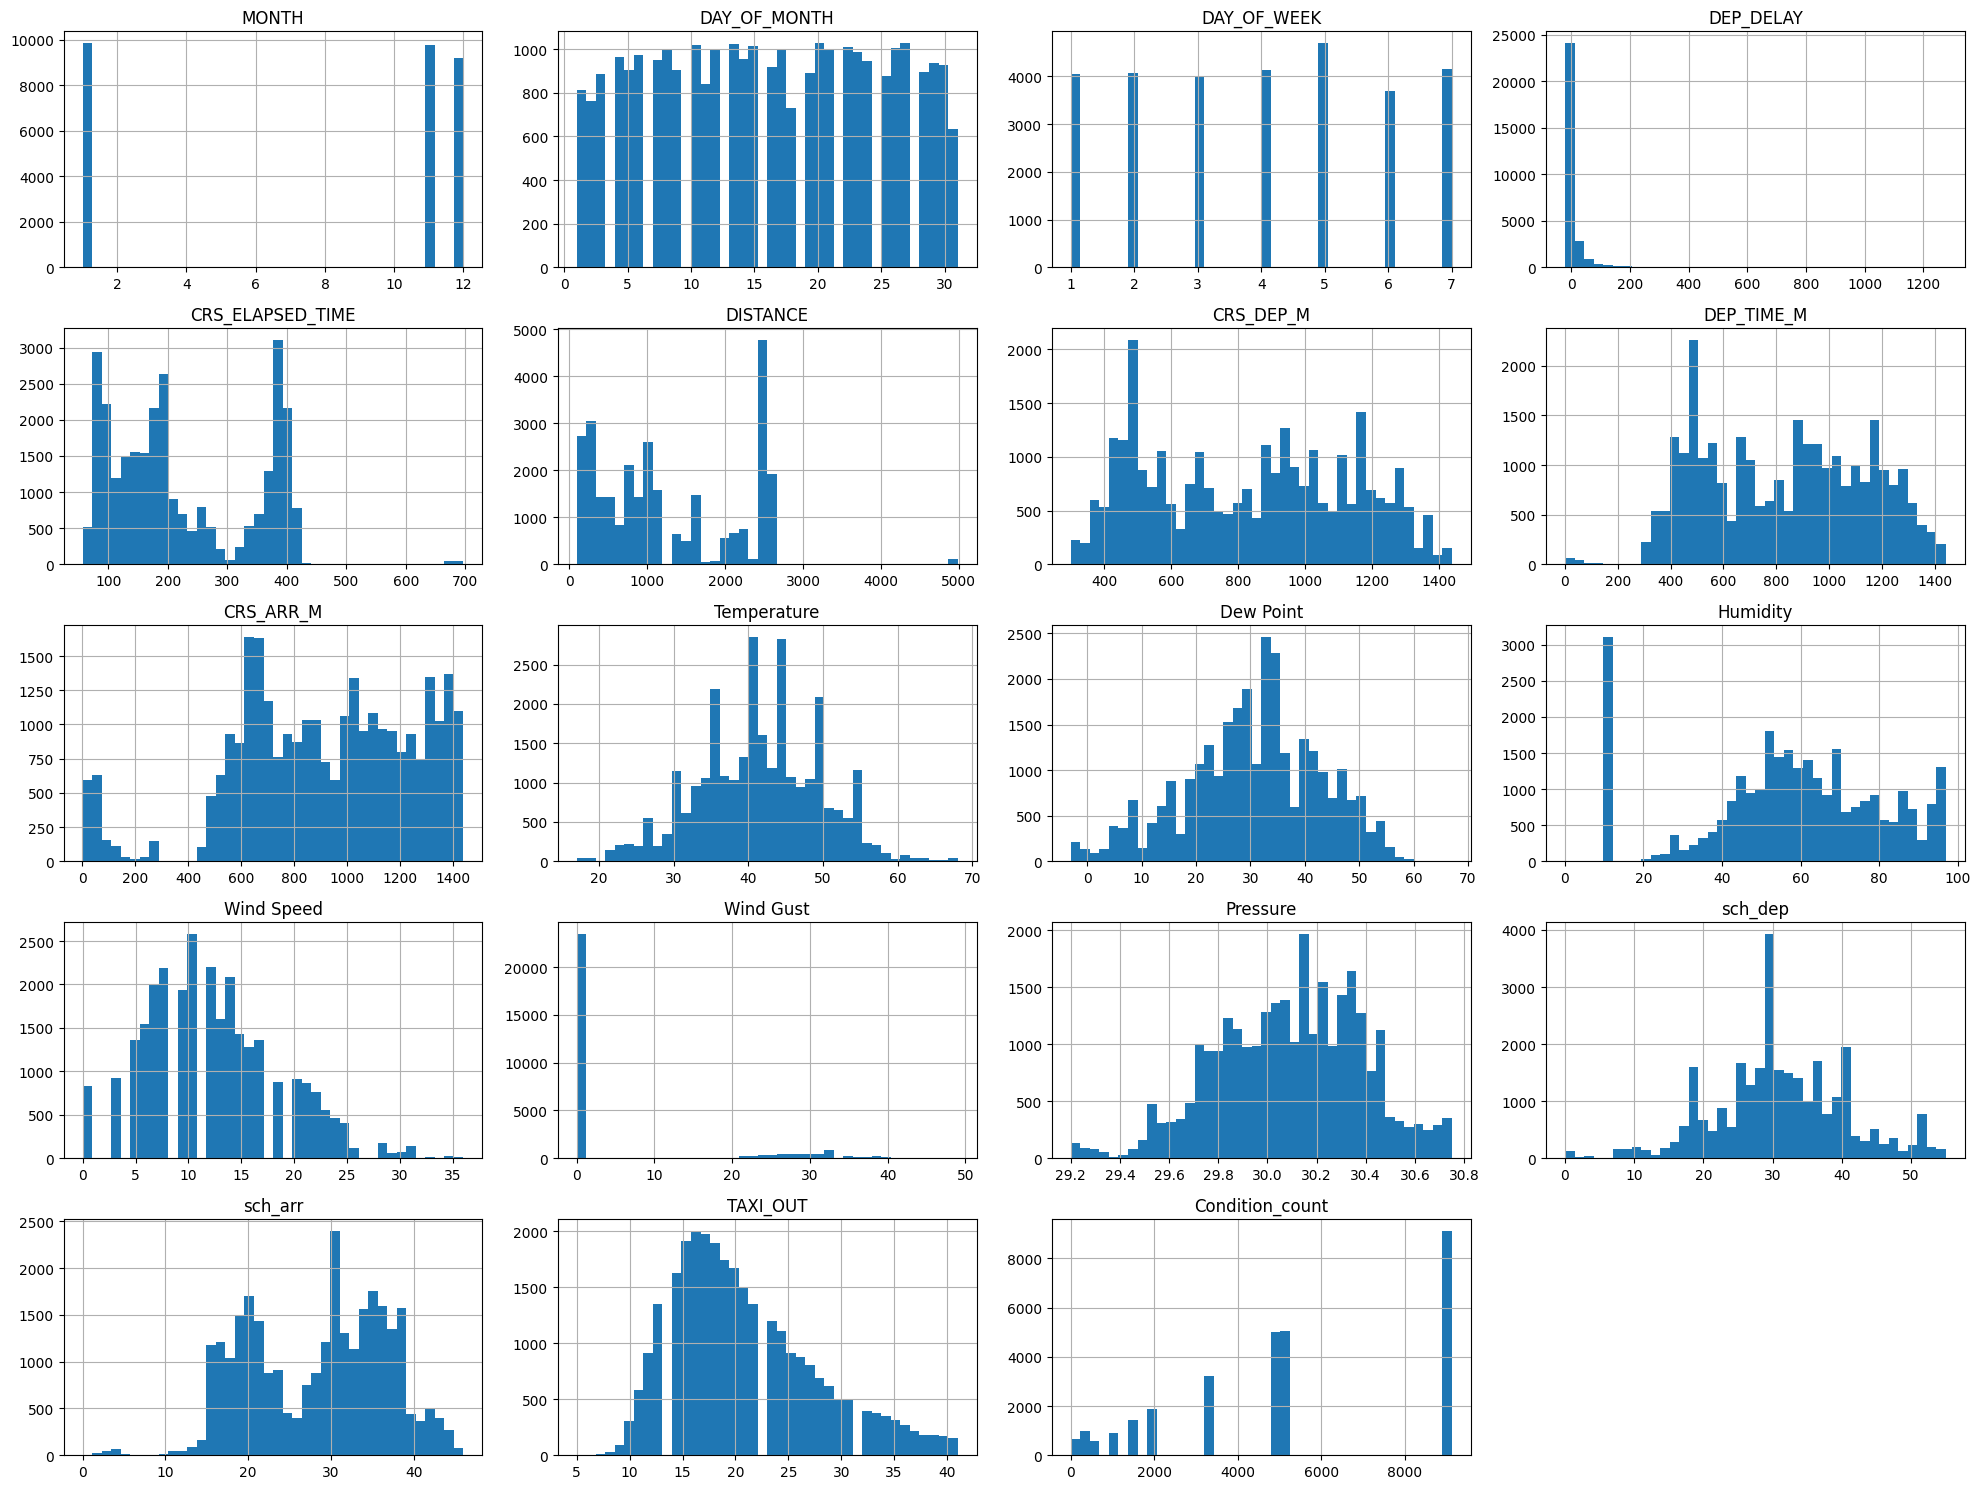

In [77]:
# histogram all numeric data to check data skews at a glance
flight_data.hist(bins=40, figsize=(20, 15))
plt.tight_layout()

# 2.2 Investigation of scheduled arrival and departure times (not used in model so can be skipped for quicker review)

Investigated sch_dep and sch_arrival to see if could calculate actual departures. If there is a different than expected number of planes departing it could impact delays and taxi out. 

In [78]:
# gauge time frame where sch_dep and sch_arr are counted
flight_data.head(30).T


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
MONTH,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
DAY_OF_MONTH,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
DAY_OF_WEEK,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
OP_UNIQUE_CARRIER,B6,B6,B6,B6,DL,AA,AA,B6,B6,B6,...,B6,B6,DL,B6,DL,DL,AA,AS,AS,B6
TAIL_NUM,N828JB,N992JB,N959JB,N999JQ,N880DN,N983NN,N107NN,N274JB,N663JB,N283JB,...,N292JB,N806JB,N119DU,N968JT,N179DN,N722TW,N585UW,N526AS,N557AS,N584JB
DEST,CHS,LAX,FLL,MCO,ATL,ORD,LAX,BUF,LGB,FLL,...,SYR,ATL,MSP,LAX,LAX,SEA,MIA,SEA,PDX,TPA
DEP_DELAY,-1,-7,40,-2,-4,-1,-1,-5,0,3,...,-3,0,-2,-7,-1,-2,4,-6,-3,-2
CRS_ELAPSED_TIME,124,371,181,168,139,161,373,80,368,184,...,73,154,187,379,365,373,184,380,375,180
DISTANCE,636,2475,1069,944,760,740,2475,301,2465,1069,...,209,760,1029,2475,2475,2422,1089,2422,2454,1005
CRS_DEP_M,324,340,301,345,360,359,360,365,365,370,...,420,418,420,425,420,425,420,430,445,447



- sch_dep/sch_arr 9/17 DEP_TIME_M max (359/05:59) - min (323/05:23) = 36 (first flights in morning starting 05:22)
- sch_dep/sch_arr 17/21 DEP_TIME_M max (419/06:59) - min (360/06:00) = 59

In [79]:
# gauge time frame where sch_dep and sch_arr are counted
flight_data.tail(23).T



,28797,28798,28799,28800,28801,28802,28803,28804,28805,28806,...,28810,28811,28812,28813,28814,28815,28816,28817,28818,28819
MONTH,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
DAY_OF_MONTH,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
DAY_OF_WEEK,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
OP_UNIQUE_CARRIER,B6,DL,B6,B6,B6,AA,9E,B6,9E,AA,...,B6,AA,B6,B6,B6,B6,AA,AS,B6,B6
TAIL_NUM,N789JB,N972AT,N987JT,N993JE,N994JL,N112AN,N315PQ,N651JB,N932XJ,N167US,...,N198JB,N111ZM,N273JB,N179JB,N279JB,N216JB,N104NN,N581AS,N957JB,N958JB
DEST,PDX,DCA,LAX,SFO,TPA,LAX,PWM,MCO,ROC,PHX,...,BOS,SFO,BUF,ROC,BTV,ORH,BOS,SEA,SJU,BQN
DEP_DELAY,9,28,21,-7,-3,19,-7,-5,-5,30,...,-2,75,-12,-11,-4,2,2,283,5,-1
CRS_ELAPSED_TIME,384,98,394,402,184,390,82,173,91,357,...,70,406,88,83,75,57,75,392,224,225
DISTANCE,2454,213,2475,2586,1005,2475,273,944,264,2153,...,187,2586,301,264,266,150,187,2422,1598,1576
CRS_DEP_M,1278,1260,1275,1309,1310,1290,1321,1319,1320,1290,...,1349,1273,1370,1370,1375,1370,1390,1125,1417,1439


- sch_dep/sch_arr 20/32 DEP_TIME_M max (1372/22:52) - min (1320/22:00) = 52. Next time point after 22:00 (1392/23:12) 
- Index 28806 min of above set DEP-TIME_M 1320/22:00 and the CRM_DEP_M,scheduled departure was 1290/21:30. The sch_arr, sch_dep were 20/32 with 22h - showing grouped based on actual dept time DEP_TIME_M
- sch_dep/sch_arr 19/23 DEP_TIME_M max (1438/23:58) - min (1392/23:12) = 59

In [80]:
# add columns of hour of actual and scheduled depature to chart to help review sch_dep and sch_arr
flight_data["Hour_act_dep_time"] = flight_data["DEP_TIME_M"].div(60).apply(np.floor)
flight_data["Hour_sch_dep_time"] = flight_data["CRS_DEP_M"].div(60).apply(np.floor)
#check
flight_data.T

,0,1,2,3,4,5,6,7,8,9,...,28810,28811,28812,28813,28814,28815,28816,28817,28818,28819
MONTH,11,11,11,11,11,11,11,11,11,11,...,1,1,1,1,1,1,1,1,1,1
DAY_OF_MONTH,1,1,1,1,1,1,1,1,1,1,...,31,31,31,31,31,31,31,31,31,31
DAY_OF_WEEK,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
OP_UNIQUE_CARRIER,B6,B6,B6,B6,DL,AA,AA,B6,B6,B6,...,B6,AA,B6,B6,B6,B6,AA,AS,B6,B6
TAIL_NUM,N828JB,N992JB,N959JB,N999JQ,N880DN,N983NN,N107NN,N274JB,N663JB,N283JB,...,N198JB,N111ZM,N273JB,N179JB,N279JB,N216JB,N104NN,N581AS,N957JB,N958JB
DEST,CHS,LAX,FLL,MCO,ATL,ORD,LAX,BUF,LGB,FLL,...,BOS,SFO,BUF,ROC,BTV,ORH,BOS,SEA,SJU,BQN
DEP_DELAY,-1,-7,40,-2,-4,-1,-1,-5,0,3,...,-2,75,-12,-11,-4,2,2,283,5,-1
CRS_ELAPSED_TIME,124,371,181,168,139,161,373,80,368,184,...,70,406,88,83,75,57,75,392,224,225
DISTANCE,636,2475,1069,944,760,740,2475,301,2465,1069,...,187,2586,301,264,266,150,187,2422,1598,1576
CRS_DEP_M,324,340,301,345,360,359,360,365,365,370,...,1349,1273,1370,1370,1375,1370,1390,1125,1417,1439


- Creating new terms where try to reproduce sch_dep with the logic of counting in one hour blocks (sch_dep_check) and make a new dataset of actual departures (act_dep_count)

In [81]:


# combine days and months and hours into unique day reference
# could have converted to numbers for continuous but kept simpler due to time constraints on analysis times and want to reference back to an hour block so will be easier to do this with a unique string value vs. continuous

flight_data["Unique_date_sch_dep"] = "D" + flight_data["DAY_OF_MONTH"].map(str) +" M" + flight_data["MONTH"].map(str) + " H" + flight_data["Hour_sch_dep_time"].map(str)
flight_data["Unique_date_act_dep"] = "D" + flight_data["DAY_OF_MONTH"].map(str) +" M" + flight_data["MONTH"].map(str) + " H" + flight_data["Hour_act_dep_time"].map(str)
# new columns to check what schedule dep and actual departure data is in hour blocks, assumed to be how they calculate it.
flight_data["sch_dep_check"] = flight_data.groupby(["Unique_date_sch_dep"])["Unique_date_sch_dep"].transform("count")
flight_data["act_dep_count"] = flight_data.groupby(["Unique_date_act_dep"])["Unique_date_act_dep"].transform("count")
#check
flight_data.T


,0,1,2,3,4,5,6,7,8,9,...,28810,28811,28812,28813,28814,28815,28816,28817,28818,28819
MONTH,11,11,11,11,11,11,11,11,11,11,...,1,1,1,1,1,1,1,1,1,1
DAY_OF_MONTH,1,1,1,1,1,1,1,1,1,1,...,31,31,31,31,31,31,31,31,31,31
DAY_OF_WEEK,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
OP_UNIQUE_CARRIER,B6,B6,B6,B6,DL,AA,AA,B6,B6,B6,...,B6,AA,B6,B6,B6,B6,AA,AS,B6,B6
TAIL_NUM,N828JB,N992JB,N959JB,N999JQ,N880DN,N983NN,N107NN,N274JB,N663JB,N283JB,...,N198JB,N111ZM,N273JB,N179JB,N279JB,N216JB,N104NN,N581AS,N957JB,N958JB
DEST,CHS,LAX,FLL,MCO,ATL,ORD,LAX,BUF,LGB,FLL,...,BOS,SFO,BUF,ROC,BTV,ORH,BOS,SEA,SJU,BQN
DEP_DELAY,-1,-7,40,-2,-4,-1,-1,-5,0,3,...,-2,75,-12,-11,-4,2,2,283,5,-1
CRS_ELAPSED_TIME,124,371,181,168,139,161,373,80,368,184,...,70,406,88,83,75,57,75,392,224,225
DISTANCE,636,2475,1069,944,760,740,2475,301,2465,1069,...,187,2586,301,264,266,150,187,2422,1598,1576
CRS_DEP_M,324,340,301,345,360,359,360,365,365,370,...,1349,1273,1370,1370,1375,1370,1390,1125,1417,1439


- Investigate what departure data looks like if delayed past midnight

In [82]:
# Create new dataset/datframe with data only for last hour (greater than 1379/22:59) and up to 300/05:00 each day (min first scheduled flight departure 301)
# new data set to drop data not between  1379/22:59 and 301/05:01 next morning
late_to_early_daily = flight_data.loc[~((flight_data["DEP_TIME_M"] < 1379)&(flight_data["DEP_TIME_M"] > 301)),:]

# Convert to DataFrame 
late_to_early_daily_table = pd.DataFrame(late_to_early_daily).reset_index()

# Display the result
late_to_early_daily_table.T



,0,1,2,3,4,5,6,7,8,9,...,648,649,650,651,652,653,654,655,656,657
index,297,298,299,300,301,574,575,576,577,903,...,28134,28467,28468,28469,28470,28471,28816,28817,28818,28819
MONTH,11,11,11,11,11,11,11,11,11,11,...,1,1,1,1,1,1,1,1,1,1
DAY_OF_MONTH,1,1,1,1,2,2,2,2,3,3,...,30,30,30,30,31,31,31,31,31,31
DAY_OF_WEEK,5,5,5,5,6,6,6,6,7,7,...,4,4,4,4,5,5,5,5,5,5
OP_UNIQUE_CARRIER,B6,B6,B6,B6,B6,B6,B6,B6,B6,B6,...,B6,AA,B6,B6,B6,B6,AA,AS,B6,B6
TAIL_NUM,N247JB,N274JB,N965JT,N996JL,N998JE,N179JB,N958JB,N949JT,N959JB,N997JL,...,N2029J,N107NN,N994JL,N948JB,N996JL,N957JB,N104NN,N581AS,N957JB,N958JB
DEST,BOS,ORH,SJU,BQN,FLL,ROC,SJU,BQN,FLL,SJU,...,FLL,BOS,SJU,BQN,SJU,FLL,BOS,SEA,SJU,BQN
DEP_DELAY,27,54,25,-2,-7,1,-2,4,-1,-10,...,-7,0,8,-4,-13,-1,2,283,5,-1
CRS_ELAPSED_TIME,68,59,228,223,181,78,228,223,181,228,...,185,75,224,225,223,185,75,392,224,225
DISTANCE,187,150,1598,1576,1069,264,1598,1576,1069,1598,...,1069,187,1598,1576,1598,1069,187,2422,1598,1576


- Index 7 (576) in  table shows there is data handling for when a flight doesn't depart until the next day. Delay time actual departure 3, scheduled dept (CRS_Dep_M) 1439 23:59 = 4mins as per dep_delay
- Unkonwn why there are 10 scheduled departures - should be none at 3 (min scheduled dept RS_Dep_M is 301) so the mechanisms of calculating this value are unknown. Can see from surrounding data that sch_dep and sch_arr still seem to be linked ot Dep_time_M, actual departure time
- Date appears to be related to CRS_DEP-M or scheduled departure time

- Next review the stats and frequency of values comparing sch_dep and comparing 2 new features [sch_dep_check = triedoduce sch_dep with the logic of counting in one hour blocks,act_dep_count = make a new dataset of actual departures]. All 3 datasets show expected count of entries but different distribution of frequency of occurencies.


In [83]:
# basic statistics of non-string columns
flight_data.describe().T

,count,mean,std,min,25%,50%,75%,max
MONTH,28820.0,7.894240,4.991723,1.0,1.00,11.00,12.00,12.00
DAY_OF_MONTH,28820.0,16.021096,8.750179,1.0,8.00,16.00,24.00,31.00
DAY_OF_WEEK,28820.0,4.008952,1.985230,1.0,2.00,4.00,6.00,7.00
DEP_DELAY,28820.0,6.374983,38.735144,-22.0,-6.00,-3.00,2.00,1276.00
CRS_ELAPSED_TIME,28820.0,225.288203,119.482417,57.0,124.00,188.00,365.00,697.00
DISTANCE,28820.0,1267.746079,889.343246,94.0,483.00,1029.00,2248.00,4983.00
CRS_DEP_M,28820.0,831.003851,299.398525,301.0,545.00,856.00,1095.00,1439.00
DEP_TIME_M,28820.0,828.934698,305.864103,1.0,542.00,854.00,1097.00,1440.00
CRS_ARR_M,28820.0,910.874289,345.411743,1.0,667.00,918.00,1193.00,1439.00
Temperature,28820.0,41.489833,8.043533,17.0,36.00,42.00,47.00,68.00


In [84]:
# Generate table of unique values and count then for column/feature of interest
value_count = flight_data["sch_dep"].value_counts()

# Convert to DataFrame 
sch_dep_given_table = pd.DataFrame(value_count)

Total = sch_dep_given_table["count"].sum()
print(Total,"\n")

# Display the result
sch_dep_given_table.head()

28820 



,count
sch_dep,
30,2270
29,1667
28,1574
31,1538
32,1489


In [85]:
# Generate table of unique values and count then for column of interest
value_count = flight_data["sch_dep_check"].value_counts()

# Convert to DataFrame 
sch_dep_check_table = pd.DataFrame(value_count)

Total = sch_dep_check_table["count"].sum()
print(Total,"\n")

# Display the result
sch_dep_check_table.head()

28820 



,count
sch_dep_check,
20,2100
22,2068
23,1978
21,1953
19,1786


In [86]:
# Generate table of unique values and count then for column of interest
value_count = flight_data["act_dep_count"].value_counts()

# Convert to DataFrame 
act_dep_count_table = pd.DataFrame(value_count)

Total = act_dep_count_table["count"].sum()
print(Total,"\n")

# Display the result
act_dep_count_table.head()

28820 



,count
act_dep_count,
23,2024
22,1958
24,1872
20,1820
21,1659


# 2.3 Data visualisation and correlation matrices generation (all features)

Use sort function to review in tabular form the highest and lowest TAXI_OUT values

In [87]:
# Sort full dataset by TAXI_OUT to look for anything notable
flight_data.sort_values("TAXI_OUT",ascending=False).head(25).T

,20769,13011,20765,6670,22185,10525,3749,11267,13915,9930,...,7792,24012,24026,9966,9965,9962,9960,9938,9968,24022
MONTH,1,12,1,11,1,12,11,12,12,12,...,11,1,1,12,12,12,12,12,12,1
DAY_OF_MONTH,6,12,6,21,11,4,12,6,15,1,...,24,16,16,1,1,1,1,1,1,16
DAY_OF_WEEK,1,4,1,4,6,3,2,5,7,7,...,7,4,4,7,7,7,7,7,7,4
OP_UNIQUE_CARRIER,B6,DL,DL,9E,DL,9E,DL,AS,DL,B6,...,MQ,DL,MQ,DL,B6,DL,B6,9E,B6,9E
TAIL_NUM,N613JB,N176DN,N717JL,N601LR,N111NG,N330PQ,N342NB,N284AK,N704X,N316JB,...,N928AE,N110DU,N842AE,N823DN,N954JB,N852DN,N971JT,N916XJ,N639JB,N228PQ
DEST,FLL,SEA,DTW,DCA,IAH,DFW,BOS,LAX,SLC,ROC,...,RIC,DFW,BNA,PHX,MCO,PDX,BQN,ROC,PDX,PIT
DEP_DELAY,-5,-2,4,-5,1,-1,25,-8,-4,197,...,-9,121,97,7,17,3,18,17,81,-3
CRS_ELAPSED_TIME,197,397,145,87,259,265,83,395,337,77,...,94,261,164,344,179,394,227,91,377,113
DISTANCE,1069,2422,509,213,1417,1391,187,2475,1990,264,...,288,1391,765,2153,944,2454,1576,264,2454,340
CRS_DEP_M,1200,1100,1165,515,470,810,917,1215,952,725,...,930,1100,1199,1095,1079,1076,1059,965,1290,1260


In [88]:
# Sort full dataset by TAXI_OUT to look for anything notable
flight_data.sort_values("TAXI_OUT").head(25).T

,718,28090,6917,27785,19530,3548,216,27864,3820,25114,...,27005,24909,3063,19614,7449,25442,6882,26933,10668,17829
MONTH,11,1,11,1,1,11,11,1,11,1,...,1,1,11,1,11,1,11,1,12,12
DAY_OF_MONTH,3,29,21,28,2,11,1,29,12,20,...,26,20,10,3,23,21,21,26,4,28
DAY_OF_WEEK,7,3,4,2,4,1,5,3,2,1,...,7,1,7,5,6,2,4,7,3,6
OP_UNIQUE_CARRIER,AS,9E,9E,9E,DL,OO,OO,9E,DL,DL,...,DL,9E,9E,AS,DL,DL,DL,9E,DL,9E
TAIL_NUM,N487AS,N907XJ,N8894A,N917XJ,N344NB,N269SY,N283SY,N915XJ,N370NW,N892DN,...,N338NW,N607LR,N907XJ,N215AK,N707TW,N893DN,N345NW,N316PQ,N896DN,N981EV
DEST,LAX,JAX,BWI,PWM,MSP,BUF,BNA,CVG,MSY,ATL,...,ATL,BNA,IND,SEA,SFO,PHX,MSY,CLE,ATL,BWI
DEP_DELAY,-2,0,-2,-13,40,158,-4,-11,-5,41,...,1,18,-1,15,158,-2,-7,-5,0,-5
CRS_ELAPSED_TIME,380,184,82,82,203,101,160,149,209,164,...,160,175,149,387,393,365,209,120,166,83
DISTANCE,2475,828,184,273,1029,301,765,589,1182,760,...,760,765,665,2422,2586,2153,1182,425,760,184
CRS_DEP_M,805,1199,1259,1321,1170,1334,1095,510,1170,1129,...,990,513,945,450,685,1165,1170,788,1255,550


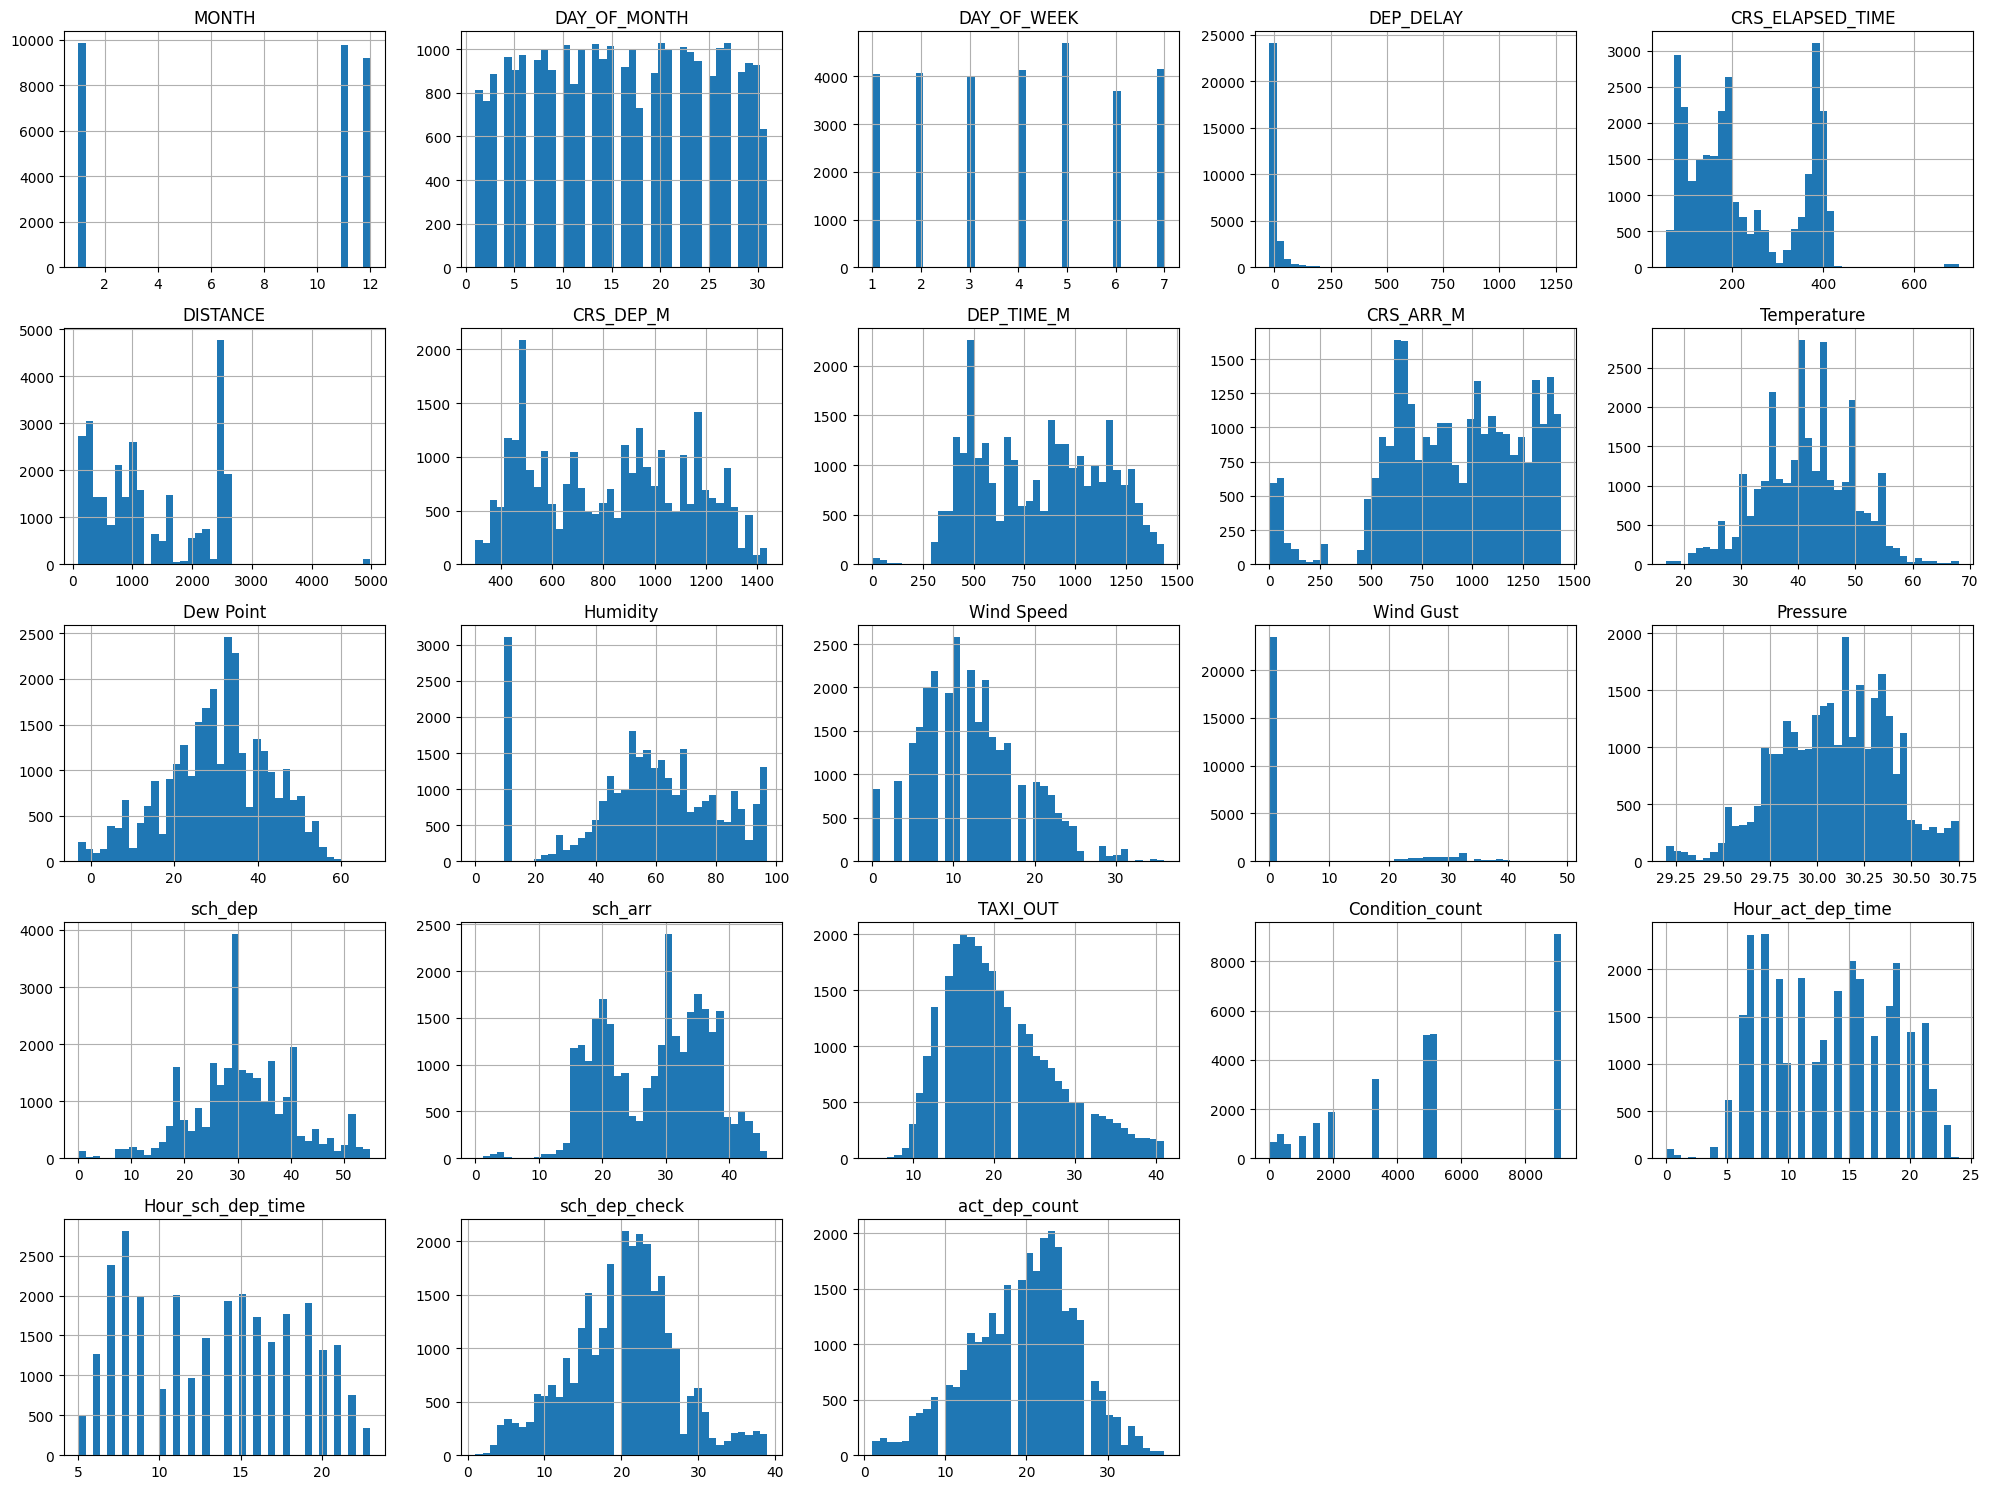

In [89]:
# redo histogram all numeric data to check data skews at a glance
# , including new columns/features [try to reproduce sch_dep (sch_dep_check) and make a new dataset of actual departures (act_dep_count)] in section 2.2 
flight_data.hist(bins=40, figsize=(20, 15))
plt.tight_layout()

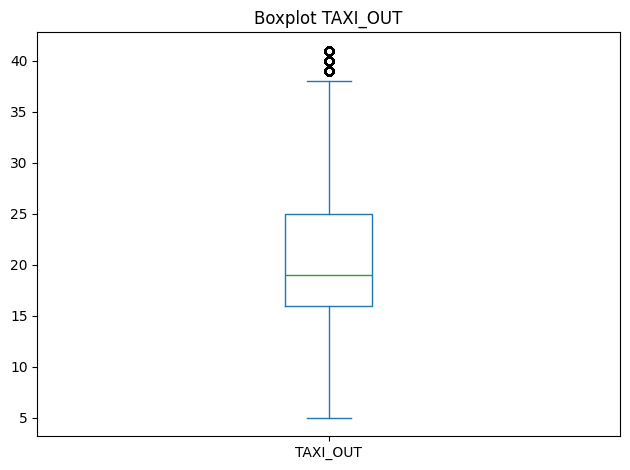

In [90]:
# View Taxi_out as boxplot
flight_data.plot(kind='box',column="TAXI_OUT",title="Boxplot TAXI_OUT")
plt.tight_layout()

Look at correlations of numeric variables to TAXI_OUT and see what can be used in the model

First look at flight and time features.

In [91]:
# Generate Correlation Matrix - Flight and time features
corr_matrix = flight_data[["TAXI_OUT","sch_dep","sch_arr","sch_dep_check","act_dep_count", "CRS_ELAPSED_TIME","DAY_OF_WEEK","DEP_DELAY","CRS_DEP_M",
                           "DEP_TIME_M","MONTH","DAY_OF_MONTH","DISTANCE","Hour_sch_dep_time"]].corr()
corr_matrix

,TAXI_OUT,sch_dep,sch_arr,sch_dep_check,act_dep_count,CRS_ELAPSED_TIME,DAY_OF_WEEK,DEP_DELAY,CRS_DEP_M,DEP_TIME_M,MONTH,DAY_OF_MONTH,DISTANCE,Hour_sch_dep_time
TAXI_OUT,1.000000,0.190101,0.064284,0.065706,0.071845,0.070838,0.028388,0.034881,0.044864,0.057896,0.018505,-0.023990,0.059856,0.047529
sch_dep,0.190101,1.000000,0.036167,0.672570,0.708754,0.083426,0.024415,-0.065452,-0.025621,0.025609,-0.006191,-0.003417,0.059174,-0.023992
sch_arr,0.064284,0.036167,1.000000,-0.021537,0.079544,-0.067669,0.009621,-0.006949,0.495286,0.544197,-0.019705,0.002223,-0.088793,0.489234
sch_dep_check,0.065706,0.672570,-0.021537,1.000000,0.762779,0.063471,-0.010363,-0.074097,-0.344391,-0.301630,0.005618,0.017887,0.043013,-0.341862
act_dep_count,0.071845,0.708754,0.079544,0.762779,1.000000,0.056443,-0.011785,-0.119447,-0.226671,-0.171088,-0.032388,0.032054,0.033433,-0.227593
CRS_ELAPSED_TIME,0.070838,0.083426,-0.067669,0.063471,0.056443,1.000000,0.000413,-0.030871,-0.031332,-0.021391,-0.016052,0.002761,0.994465,-0.025273
DAY_OF_WEEK,0.028388,0.024415,0.009621,-0.010363,-0.011785,0.000413,1.000000,-0.006203,0.005411,0.008256,0.029365,-0.029732,0.002450,0.005862
DEP_DELAY,0.034881,-0.065452,-0.006949,-0.074097,-0.119447,-0.030871,-0.006203,1.000000,0.102384,0.072340,0.046455,-0.036618,-0.031507,0.102445
CRS_DEP_M,0.044864,-0.025621,0.495286,-0.344391,-0.226671,-0.031332,0.005411,0.102384,1.000000,0.946023,0.001824,0.001754,-0.040963,0.998044
DEP_TIME_M,0.057896,0.025609,0.544197,-0.301630,-0.171088,-0.021391,0.008256,0.072340,0.946023,1.000000,0.002632,0.004446,-0.034604,0.944338


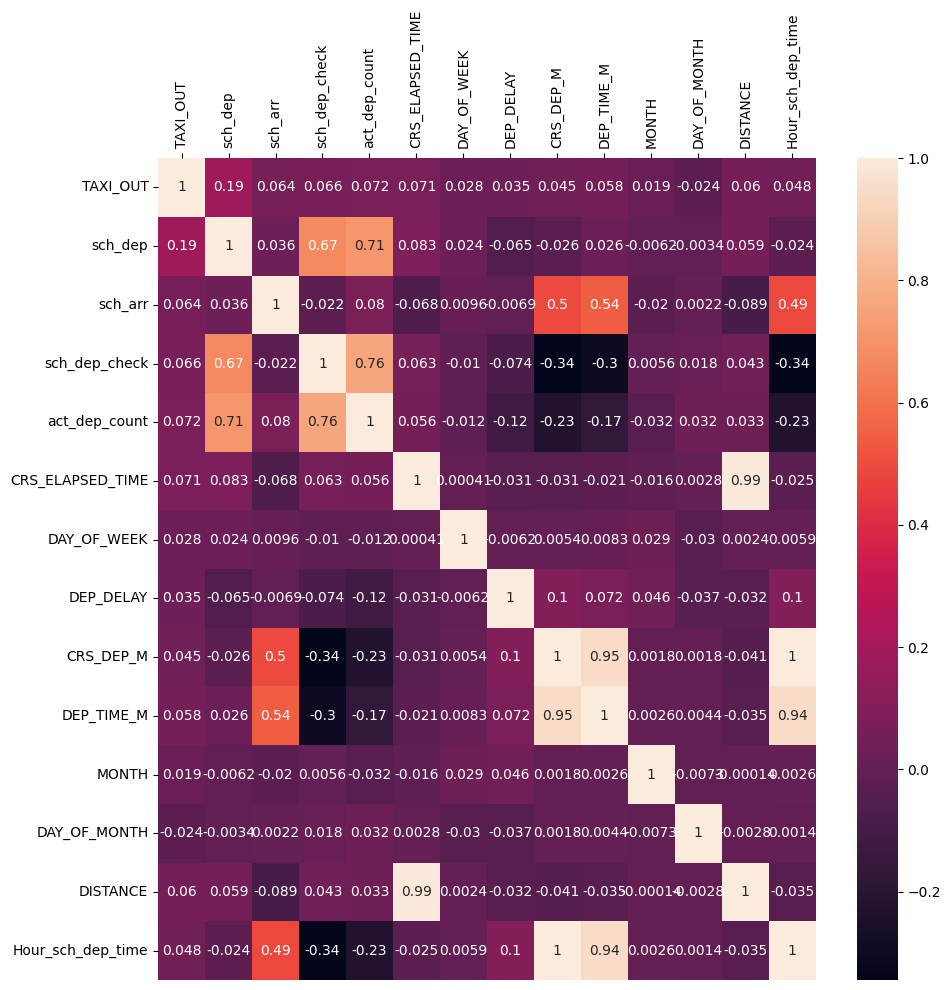

In [92]:
## visualize the correlation matrix
plt.figure(figsize=(10,10))
ax = sns.heatmap(corr_matrix, annot=True)
# Move x-axis tick labels to the top
ax.xaxis.tick_top()
plt.xticks(rotation=90)
plt.tight_layout()

 Will not use own variables of sch_dept_check and act_dept_count as highly correlate with sch_dep and not enough domain knowledge to know it is appropriate to include this

In [93]:
# Generate Correlation Matrix - Flight and time features - without sch_dept_check and act_dept_count
corr_matrix = flight_data[["TAXI_OUT","sch_dep","sch_arr", "CRS_ELAPSED_TIME","DEP_DELAY","CRS_DEP_M",
                           "DEP_TIME_M","DISTANCE","DAY_OF_WEEK","MONTH","DAY_OF_MONTH"]].corr()
corr_matrix

,TAXI_OUT,sch_dep,sch_arr,CRS_ELAPSED_TIME,DEP_DELAY,CRS_DEP_M,DEP_TIME_M,DISTANCE,DAY_OF_WEEK,MONTH,DAY_OF_MONTH
TAXI_OUT,1.000000,0.190101,0.064284,0.070838,0.034881,0.044864,0.057896,0.059856,0.028388,0.018505,-0.023990
sch_dep,0.190101,1.000000,0.036167,0.083426,-0.065452,-0.025621,0.025609,0.059174,0.024415,-0.006191,-0.003417
sch_arr,0.064284,0.036167,1.000000,-0.067669,-0.006949,0.495286,0.544197,-0.088793,0.009621,-0.019705,0.002223
CRS_ELAPSED_TIME,0.070838,0.083426,-0.067669,1.000000,-0.030871,-0.031332,-0.021391,0.994465,0.000413,-0.016052,0.002761
DEP_DELAY,0.034881,-0.065452,-0.006949,-0.030871,1.000000,0.102384,0.072340,-0.031507,-0.006203,0.046455,-0.036618
CRS_DEP_M,0.044864,-0.025621,0.495286,-0.031332,0.102384,1.000000,0.946023,-0.040963,0.005411,0.001824,0.001754
DEP_TIME_M,0.057896,0.025609,0.544197,-0.021391,0.072340,0.946023,1.000000,-0.034604,0.008256,0.002632,0.004446
DISTANCE,0.059856,0.059174,-0.088793,0.994465,-0.031507,-0.040963,-0.034604,1.000000,0.002450,-0.000144,-0.002762
DAY_OF_WEEK,0.028388,0.024415,0.009621,0.000413,-0.006203,0.005411,0.008256,0.002450,1.000000,0.029365,-0.029732
MONTH,0.018505,-0.006191,-0.019705,-0.016052,0.046455,0.001824,0.002632,-0.000144,0.029365,1.000000,-0.007254


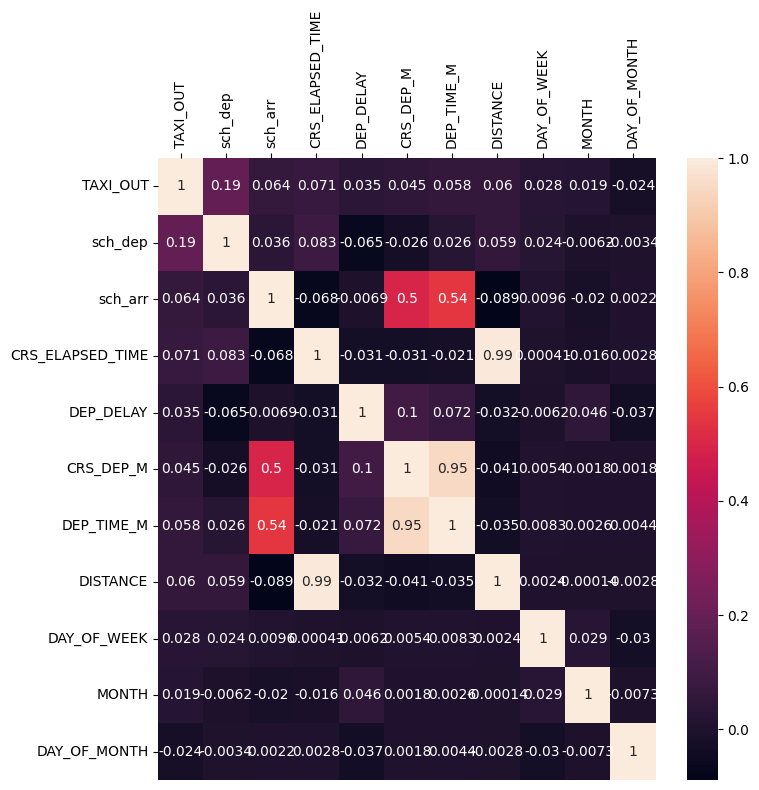

In [94]:
## visualize the correlation matrix
plt.figure(figsize=(8,8))
ax = sns.heatmap(corr_matrix, annot=True)
# Move x-axis tick labels to the top
ax.xaxis.tick_top()
plt.xticks(rotation=90)
plt.tight_layout()

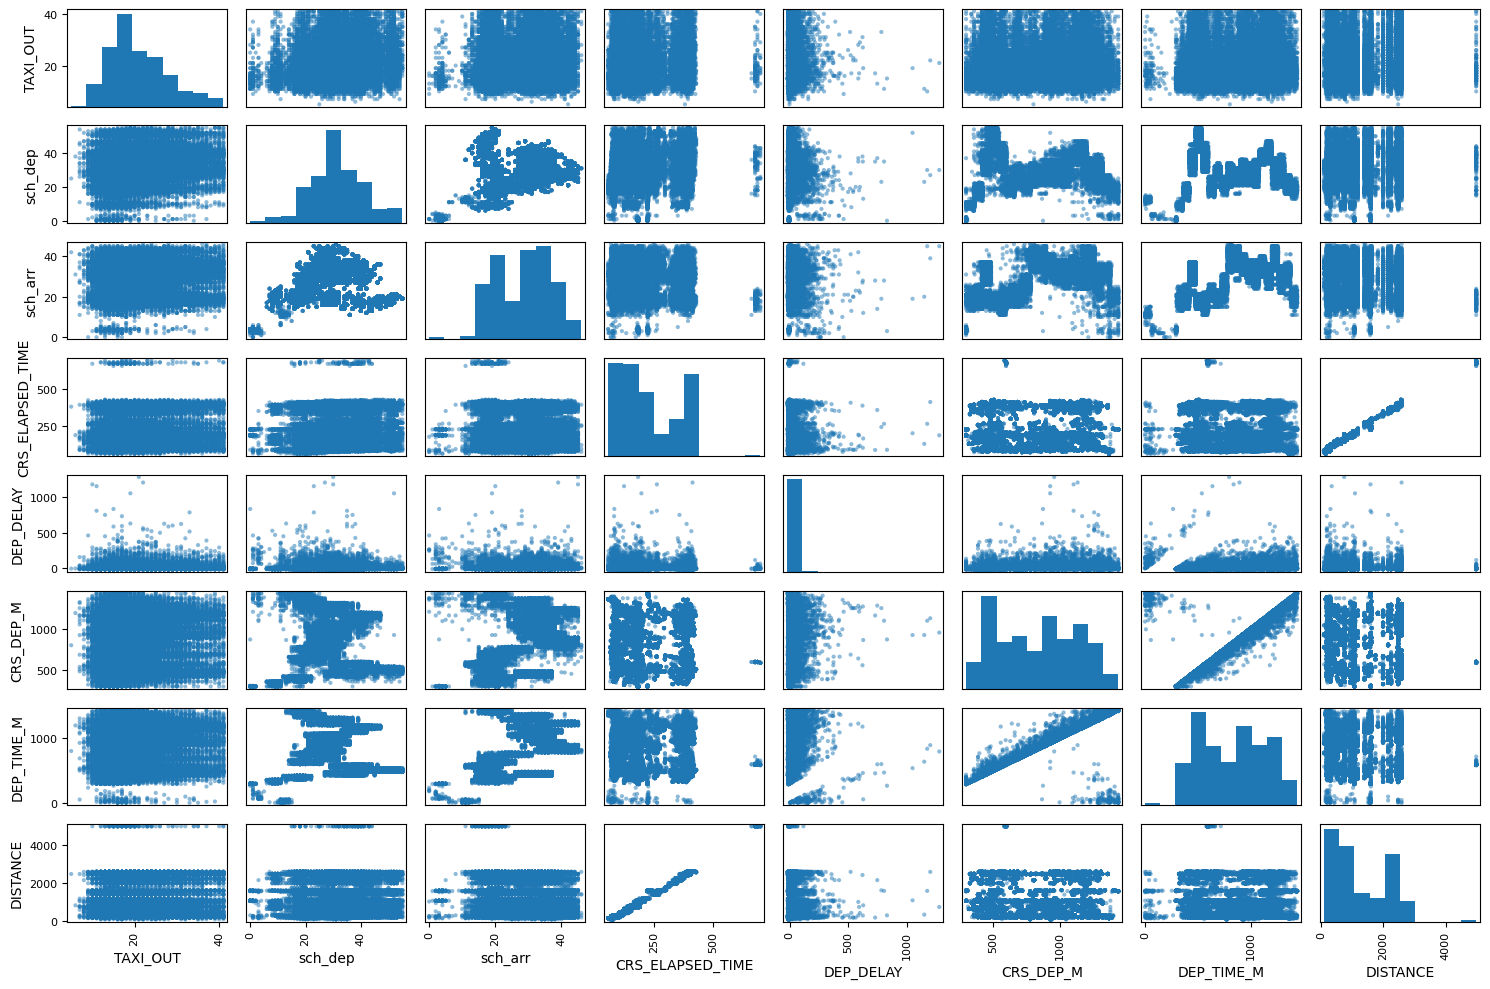

In [95]:
# Generate scatter matrix comparable to correlation matrix of Flight and time features
# visualise the data relationships and the correlation numbers if presented beside each other
# Takes a long time to generate so only included up to distance, excluding week and month data that very weakly correlated
from pandas.plotting import scatter_matrix
attributes = ["TAXI_OUT","sch_dep","sch_arr", "CRS_ELAPSED_TIME","DEP_DELAY","CRS_DEP_M",
            "DEP_TIME_M","DISTANCE"]
scatter_matrix(flight_data[attributes], figsize=(15,10))

plt.tight_layout()

Model anything with corr >0.05 and ensure those features don't correlate well to another for flight and time features

1) sch_dep has highest correlation (0.19)
2) sch_arr
3) Distance and CRS_ELAPSED TIME have a 0.99 correlation to each other so will use CRS_ELAPSED TIME
4) DEP_TIME_M and CRS_DEP_M are highly correlated and only DEP-TIME_M is >0.05 so will use this

Now look at weather/climate features


In [96]:
# Generate Correlation Matrix - Weather/climate features
corr_matrix = flight_data[["TAXI_OUT","Temperature","Dew Point","Humidity","Wind Speed","Wind Gust","Pressure","Condition_count"]].corr()
corr_matrix

,TAXI_OUT,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,Condition_count
TAXI_OUT,1.000000,-0.067574,0.010216,-0.026826,0.062522,0.095643,-0.059290,-0.094771
Temperature,-0.067574,1.000000,0.787864,0.054401,0.010603,-0.039487,-0.376730,0.012184
Dew Point,0.010216,0.787864,1.000000,0.195262,-0.142122,-0.163160,-0.489134,-0.043672
Humidity,-0.026826,0.054401,0.195262,1.000000,-0.110274,-0.106828,0.033677,0.239339
Wind Speed,0.062522,0.010603,-0.142122,-0.110274,1.000000,0.698795,-0.309978,-0.392897
Wind Gust,0.095643,-0.039487,-0.163160,-0.106828,0.698795,1.000000,-0.186249,-0.432838
Pressure,-0.059290,-0.376730,-0.489134,0.033677,-0.309978,-0.186249,1.000000,0.221702
Condition_count,-0.094771,0.012184,-0.043672,0.239339,-0.392897,-0.432838,0.221702,1.000000


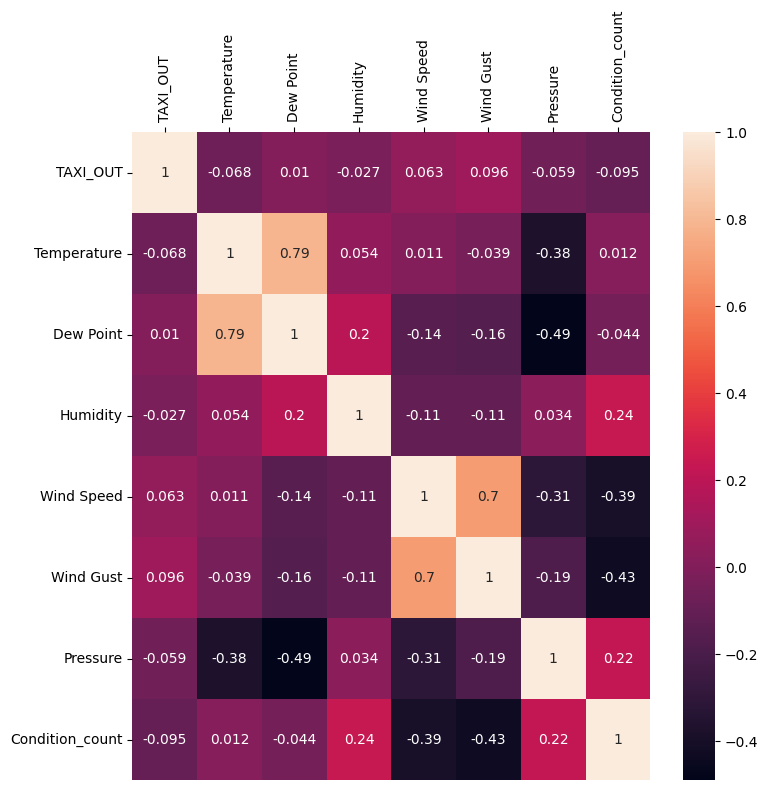

In [97]:
## visualize the correlation matrix
plt.figure(figsize=(8,8))
ax = sns.heatmap(corr_matrix, annot=True)
# Move x-axis tick labels to the top
ax.xaxis.tick_top()
plt.xticks(rotation=90)
plt.tight_layout()

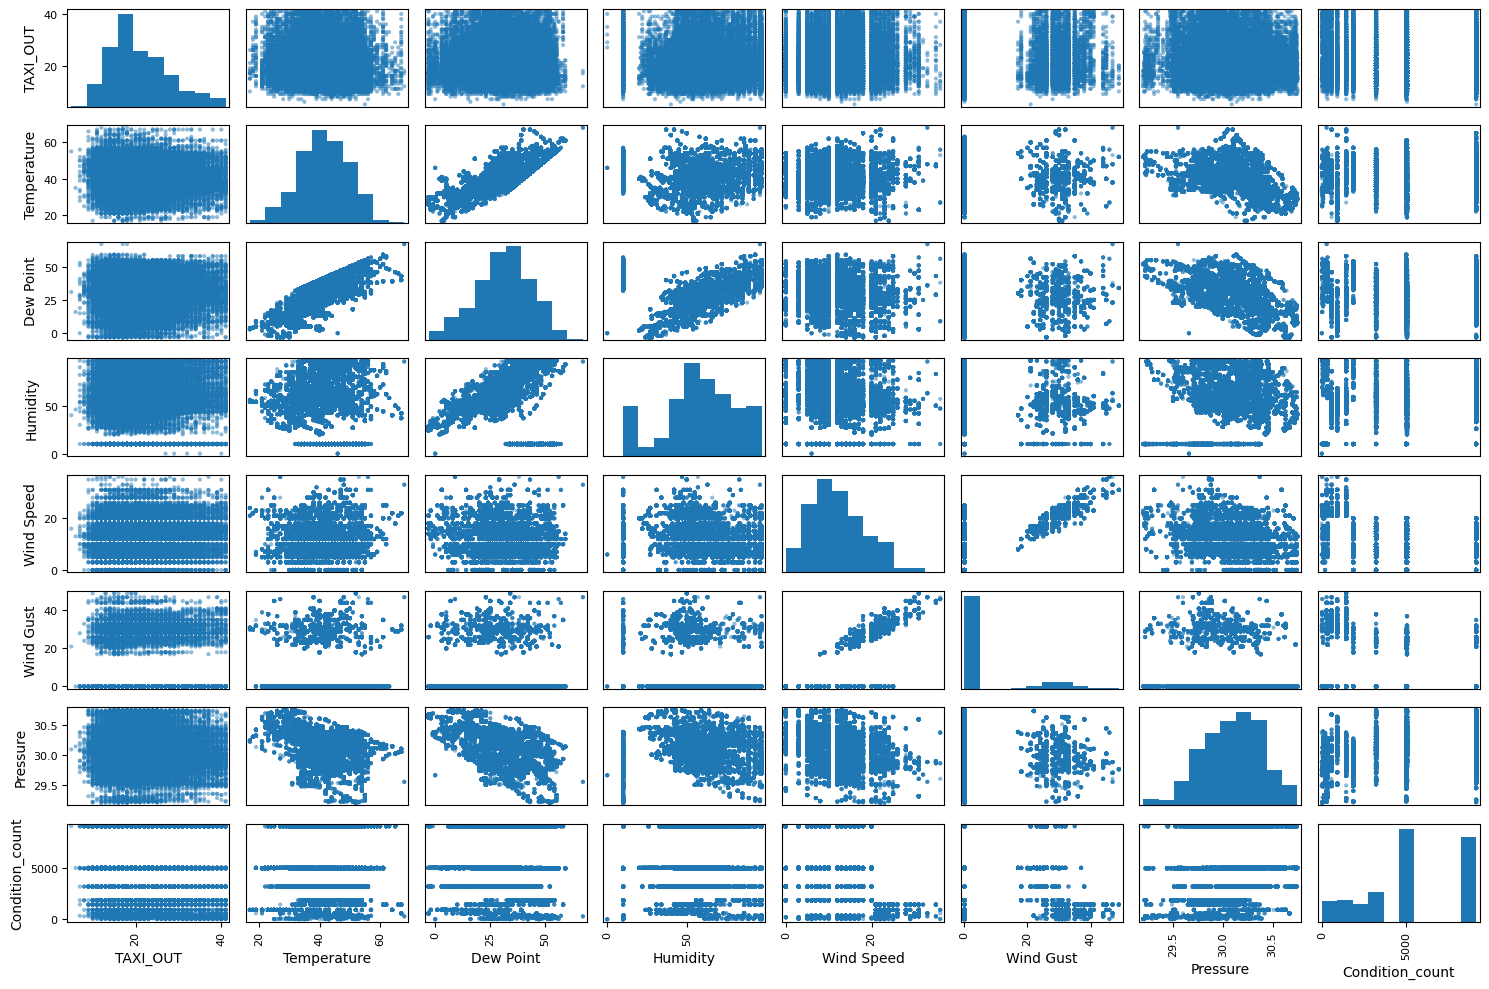

In [98]:
# Generate scatter matrix comparable to correlation matrix of weather features
# visualise the data relationships and the correlation numbers if presented beside each other
from pandas.plotting import scatter_matrix
attributes = ["TAXI_OUT","Temperature","Dew Point","Humidity","Wind Speed","Wind Gust","Pressure","Condition_count"]
scatter_matrix(flight_data[attributes], figsize=(15,10))

plt.tight_layout()

Model anything with corr >0.05 and ensure those features don't correlate well to another

Weather/climate conditions 
1) only ones above 0.05 are wind speed and wind gust, which correlate highly to eaach other (0.7) so use wind gust with highest correlation. Wind speed closest looking histogram to Taxi-out. Not shown, but when substitued in wind speed instead of wind gust in models later, did give slightly lower r2
2) negative correlation temperature -0.068, <-0.05 may try. Strongly correlated to dew point (0.7) but this has very weak correlation to taxi_out at 0.01
3) negative correlation pressue -0.059
4) Condition_count negative correlation -0.095 - own variable where based on frequency of conditions, assumes less severe weather will have lower counts and likely to affect flights more. 


# 3. Investigating and Building the Linear Regression Models

# 3.1 Look first at 8 factors with correlation >0.5 and excluding other features if they strongly correlate to one of these (refer to section 2.3)

Start with Multiple Linear Regression (MLR) or Ordinary Least Squares (OLS) 

In [99]:
# 8 factors
## build the machine learning algorithm
X = flight_data[["Wind Gust","Pressure","Temperature","Condition_count","sch_dep","sch_arr","CRS_ELAPSED_TIME","DEP_TIME_M"]].values
y = flight_data['TAXI_OUT'].values

## data spliting
# 20% data for testing and 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# print X-train to view
X_train

array([[   0.  ,   30.33,   38.  , ...,   21.  ,  124.  ,  313.  ],
       [   0.  ,   30.26,   23.  , ...,   17.  ,  252.  ,  393.  ],
       [   0.  ,   30.37,   45.  , ...,   30.  ,  314.  , 1186.  ],
       ...,
       [   0.  ,   30.2 ,   49.  , ...,   40.  ,  124.  , 1218.  ],
       [   0.  ,   30.48,   33.  , ...,   36.  ,  106.  , 1198.  ],
       [   0.  ,   30.13,   42.  , ...,   28.  ,  391.  , 1043.  ]],
      shape=(23056, 8))

In [100]:
## feature scaling as there is big difference in data 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# check X-train
X_train

array([[-0.46665047,  0.80698756, -0.4403404 , ..., -0.89663267,
        -0.84351463, -1.68396091],
       [-0.46665047,  0.5701847 , -2.30928637, ..., -1.3821966 ,
         0.22773712, -1.42270057],
       [-0.46665047,  0.94230348,  0.43183438, ...,  0.19588617,
         0.74662468,  1.16704255],
       ...,
       [-0.46665047,  0.36721082,  0.93021997, ...,  1.40979599,
        -0.84351463,  1.27154668],
       [-0.46665047,  1.31442226, -1.06332239, ...,  0.92423206,
        -0.99415941,  1.2062316 ],
       [-0.46665047,  0.13040796,  0.05804519, ..., -0.0468958 ,
         1.39104957,  0.70003969]], shape=(23056, 8))

In [101]:
## multi linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [102]:
## prediction on the test set
y_pred_mlr = lin_reg.predict(X_test)

## model evaluation 
r2 = metrics.r2_score(y_test, y_pred_mlr)
meanABerr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R2:',r2)
print('Mean Absolute Error:',meanABerr)
print('Mean Square Error:',meanSqErr)
print('Root Mean Square Error:',rootMeanSqErr)



R2: 0.07698932975042827
Mean Absolute Error: 5.276257995529027
Mean Square Error: 43.50615464435823
Root Mean Square Error: 6.595919545018589


Check if MLR impoves if apply regularisation penalties through ridge or lasso modelling

In [103]:
# created an instance for the model
model_lasso = Lasso(alpha = 0.1)
model_ridge = Ridge(alpha = 0.1)

In [104]:
# train the model
model_lasso.fit(X_train, y_train)
model_ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [105]:
y_pred_lasso = model_lasso.predict(X_test)
## model evaluation 
r2 = metrics.r2_score(y_test, y_pred_lasso)
meanABerr = metrics.mean_absolute_error(y_test, y_pred_lasso)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_lasso)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso))
print('R2:',r2)
print('Mean Absolute Error:',meanABerr)
print('Mean Square Error:',meanSqErr)
print('Root Mean Square Error:',rootMeanSqErr)


R2: 0.07382618354311232
Mean Absolute Error: 5.287466614056556
Mean Square Error: 43.655249700887744
Root Mean Square Error: 6.607211946115226


In [106]:
y_pred_ridge = model_ridge.predict(X_test)
## model evaluation 
r2 = metrics.r2_score(y_test, y_pred_ridge)
meanABerr = metrics.mean_absolute_error(y_test, y_pred_ridge)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_ridge)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge))
print('R2:',r2)
print('Mean Absolute Error:',meanABerr)
print('Mean Square Error:',meanSqErr)
print('Root Mean Square Error:',rootMeanSqErr)


R2: 0.07698928453301734
Mean Absolute Error: 5.2762582410018615
Mean Square Error: 43.50615677568318
Root Mean Square Error: 6.595919706582485


# 3.2 Look at tuning alpha with repeated Kfold and RidgeCV and investigate effect of adjusting alpha 


In [107]:
# tuning alpha

# K fold cross validation - resampling procedure - splitting data into 100s and running it 3 times, random_state set to random integer so it runs consistently
cv = RepeatedKFold(n_splits=100, n_repeats=3,random_state=42)


# define the model. repeat the k fold across all the alphas. scoring = judge best of the kfold. 
model = RidgeCV(alphas =(0.1,1,10), cv = cv, scoring = "neg_mean_absolute_error")

#fit the model
model.fit(X_test,y_test)



RidgeCV(alphas=(0.1, 1, 10),
        cv=RepeatedKFold(n_repeats=3, n_splits=100, random_state=42),
        scoring='neg_mean_absolute_error')

In [108]:
# summary of chosen configuration
print(model.alpha_)

0.1


In [109]:
# inxcrease the alpha
# created an instance for the model
model_lasso = Lasso(alpha = 1)
model_ridge = Ridge(alpha = 1)

In [110]:
# train the model
model_lasso.fit(X_train, y_train)
model_ridge.fit(X_train, y_train)

Ridge(alpha=1)

In [111]:
y_pred_lasso = model_lasso.predict(X_test)
## model evaluation 
r2 = metrics.r2_score(y_test, y_pred_lasso)
meanABerr = metrics.mean_absolute_error(y_test, y_pred_lasso)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_lasso)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso))
print('R2:',r2)
print('Mean Absolute Error:',meanABerr)
print('Mean Square Error:',meanSqErr)
print('Root Mean Square Error:',rootMeanSqErr)

R2: 0.014816599940930764
Mean Absolute Error: 5.472953532728844
Mean Square Error: 46.436669409721155
Root Mean Square Error: 6.8144456421429584


In [112]:
y_pred_ridge = model_ridge.predict(X_test)
## model evaluation 
r2 = metrics.r2_score(y_test, y_pred_ridge)
meanABerr = metrics.mean_absolute_error(y_test, y_pred_ridge)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_ridge)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge))
print('R2:',r2)
print('Mean Absolute Error:',meanABerr)
print('Mean Square Error:',meanSqErr)
print('Root Mean Square Error:',rootMeanSqErr)

R2: 0.07698887748351368
Mean Absolute Error: 5.276260450168998
Mean Square Error: 43.50617596198213
Root Mean Square Error: 6.595921160988974


Increasing alpha decreases r2 of Lasso with minimal effect on Ridge. Likely due to Lasso getting rid of features whereas Ridge won't do this and looks very similar to MLR alone values. 

# 3.3 Look at only 3 factors where correlation was closest to 0.1/-0.1

Start with Multiple Linear Regression (MLR) or Ordinary Least Squares (OLS) 


In [113]:
# 3 factors - smaller feature set (sm)
## build the machine learning algorithm
Xsm = flight_data[["Wind Gust", "sch_dep","Condition_count"]].values
ysm = flight_data['TAXI_OUT'].values

## data spliting
# 20% data for testing and 80% for training
Xsm_train, Xsm_test, ysm_train, ysm_test = train_test_split(Xsm, ysm, test_size=0.20, random_state=42)

# print X-train to view
Xsm_train

array([[   0,   13, 5038],
       [   0,   15, 5038],
       [   0,   41, 4992],
       ...,
       [   0,   25, 5038],
       [   0,   47, 3209],
       [   0,   27, 3209]], shape=(23056, 3))

In [114]:
## feature scaling as there is big difference in data 
sc = StandardScaler()
Xsm_train = sc.fit_transform(Xsm_train)
Xsm_test = sc.transform(Xsm_test)

# check X-train
Xsm_train

array([[-0.46665047, -1.90523318, -0.06603055],
       [-0.46665047, -1.69469827, -0.06603055],
       [-0.46665047,  1.04225555, -0.08119764],
       ...,
       [-0.46665047, -0.64202372, -0.06603055],
       [-0.46665047,  1.67386028, -0.66908727],
       [-0.46665047, -0.43148881, -0.66908727]], shape=(23056, 3))

In [115]:
## multi linear regression
lin_reg = LinearRegression()
lin_reg.fit(Xsm_train, ysm_train)

LinearRegression()

In [116]:
## prediction on the test set
ysm_pred_mlr_sm = lin_reg.predict(Xsm_test)

## model evaluation 
r2sm = metrics.r2_score(ysm_test, ysm_pred_mlr_sm)
meanABerr_sm = metrics.mean_absolute_error(ysm_test, ysm_pred_mlr_sm)
meanSqErr_sm = metrics.mean_squared_error(ysm_test, ysm_pred_mlr_sm)
rootMeanSqErr_sm = np.sqrt(metrics.mean_squared_error(ysm_test, ysm_pred_mlr_sm))
print('R2:',r2sm)
print('Mean Absolute Error:',meanABerr_sm)
print('Mean Square Error:',meanSqErr_sm)
print('Root Mean Square Error:',rootMeanSqErr_sm)

R2: 0.058551749523216956
Mean Absolute Error: 5.325844957231348
Mean Square Error: 44.37521092126554
Root Mean Square Error: 6.661472128686387


Check if MLR impoves if apply regularisation penalties through ridge or lasso modelling

In [117]:
# created an instance for the model
model_lasso = Lasso(alpha = 0.1)
model_ridge = Ridge(alpha = 0.1)

# train the model
model_lasso.fit(Xsm_train, ysm_train)
model_ridge.fit(Xsm_train, ysm_train)

Ridge(alpha=0.1)

In [118]:
y_pred_sm_lasso = model_lasso.predict(Xsm_test)
## model evaluation 
r2sm = metrics.r2_score(ysm_test, y_pred_sm_lasso)
meanABerr_sm = metrics.mean_absolute_error(ysm_test, y_pred_sm_lasso)
meanSqErr_sm = metrics.mean_squared_error(ysm_test, y_pred_sm_lasso)
rootMeanSqErr_sm = np.sqrt(metrics.mean_squared_error(ysm_test, y_pred_sm_lasso))
print('R2:',r2sm)
print('Mean Absolute Error:',meanABerr_sm)
print('Mean Square Error:',meanSqErr_sm)
print('Root Mean Square Error:',rootMeanSqErr_sm)

R2: 0.056962975541062
Mean Absolute Error: 5.334277106819668
Mean Square Error: 44.4500978633026
Root Mean Square Error: 6.667090659598278


In [119]:
y_pred_sm_ridge = model_ridge.predict(Xsm_test)
## model evaluation 
r2sm = metrics.r2_score(ysm_test, y_pred_sm_ridge)
meanABerr_sm = metrics.mean_absolute_error(ysm_test, y_pred_sm_ridge)
meanSqErr_sm = metrics.mean_squared_error(ysm_test, y_pred_sm_ridge)
rootMeanSqErr_sm = np.sqrt(metrics.mean_squared_error(ysm_test, y_pred_sm_ridge))
print('R2:',r2sm)
print('Mean Absolute Error:',meanABerr_sm)
print('Mean Square Error:',meanSqErr_sm)
print('Root Mean Square Error:',rootMeanSqErr_sm)

R2: 0.05855171444123297
Mean Absolute Error: 5.325845258176163
Mean Square Error: 44.37521257485663
Root Mean Square Error: 6.661472252802426


# 3.4 Look at 14 features (excluded week/month data and time scheduled to arrive at another airport)
Start with Multiple Linear Regression (MLR) or Ordinary Least Squares (OLS) 


In [120]:
# more factors (mr)
# 14 factors - add in correlating columns
## build the machine learning algorithm
Xmr = flight_data[["Wind Speed","DEP_DELAY","Wind Gust","DISTANCE","DEP_TIME_M","Pressure","Dew Point",
                 "Humidity","Temperature","Condition_count","sch_dep","sch_arr","CRS_ELAPSED_TIME","DEP_TIME_M"]].values
ymr = flight_data['TAXI_OUT'].values

## data spliting
# 20% data for testing and 80% for training
Xmr_train, Xmr_test, ymr_train, ymr_test = train_test_split(Xmr, ymr, test_size=0.20, random_state=42)

# print X-train to view
Xmr_train

array([[   3.,  -11.,    0., ...,   21.,  124.,  313.],
       [  20.,   -7.,    0., ...,   17.,  252.,  393.],
       [  10.,   -7.,    0., ...,   30.,  314., 1186.],
       ...,
       [  14.,   -7.,    0., ...,   40.,  124., 1218.],
       [   3.,   -2.,    0., ...,   36.,  106., 1198.],
       [   6.,  -12.,    0., ...,   28.,  391., 1043.]], shape=(23056, 14))

In [121]:
## feature scaling as there is big difference in data 
sc = StandardScaler()
Xmr_train = sc.fit_transform(Xmr_train)
Xmr_test = sc.transform(Xmr_test)

# check X-train
Xmr_train

array([[-1.4971603 , -0.44689227, -0.46665047, ..., -0.89663267,
        -0.84351463, -1.68396091],
       [ 1.21736385, -0.34398876, -0.46665047, ..., -1.3821966 ,
         0.22773712, -1.42270057],
       [-0.37941506, -0.34398876, -0.46665047, ...,  0.19588617,
         0.74662468,  1.16704255],
       ...,
       [ 0.25929651, -0.34398876, -0.46665047, ...,  1.40979599,
        -0.84351463,  1.27154668],
       [-1.4971603 , -0.21535938, -0.46665047, ...,  0.92423206,
        -0.99415941,  1.2062316 ],
       [-1.01812662, -0.47261814, -0.46665047, ..., -0.0468958 ,
         1.39104957,  0.70003969]], shape=(23056, 14))

In [122]:
## multi linear regression
lin_reg = LinearRegression()
lin_reg.fit(Xmr_train, ymr_train)

LinearRegression()

In [123]:
## prediction on the test set
ymr_pred_mlr = lin_reg.predict(Xmr_test)

## model evaluation 
r2mr = metrics.r2_score(ymr_test, ymr_pred_mlr)
meanABerr_mr = metrics.mean_absolute_error(ymr_test, ymr_pred_mlr)
meanSqErr_mr = metrics.mean_squared_error(ymr_test, ymr_pred_mlr)
rootMeanSqErr_mr = np.sqrt(metrics.mean_squared_error(ymr_test, ymr_pred_mlr))
print('R2:',r2mr)
print('Mean Absolute Error:',meanABerr_mr)
print('Mean Square Error:',meanSqErr_mr)
print('Root Mean Square Error:',rootMeanSqErr_mr)

R2: 0.08341315176606645
Mean Absolute Error: 5.26309271233788
Mean Square Error: 43.20336746862101
Root Mean Square Error: 6.572926857087412


Check if MLR impoves if apply regularisation penalties through ridge or lasso modelling

In [124]:
# create an instance for the model
model_lasso = Lasso(alpha = 0.1)
model_ridge = Ridge(alpha = 0.1)

# train the model
model_lasso.fit(Xmr_train, ymr_train)
model_ridge.fit(Xmr_train, ymr_train)

Ridge(alpha=0.1)

In [125]:
ymr_pred_lasso = model_lasso.predict(Xmr_test)
## model evaluation 
r2mr = metrics.r2_score(ymr_test, ymr_pred_lasso)
meanABerr_mr = metrics.mean_absolute_error(ymr_test, ymr_pred_lasso)
meanSqErr_mr = metrics.mean_squared_error(ymr_test, ymr_pred_lasso)
rootMeanSqErr_mr = np.sqrt(metrics.mean_squared_error(ymr_test, ymr_pred_lasso))
print('R2:',r2mr)
print('Mean Absolute Error:',meanABerr_mr)
print('Mean Square Error:',meanSqErr_mr)
print('Root Mean Square Error:',rootMeanSqErr_mr)

R2: 0.08047426045040385
Mean Absolute Error: 5.274118887511116
Mean Square Error: 43.341892259485675
Root Mean Square Error: 6.583455951055318


In [126]:
ymr_pred_ridge = model_ridge.predict(Xmr_test)
## model evaluation 
r2mr = metrics.r2_score(ymr_test, ymr_pred_ridge)
meanABerr_mr = metrics.mean_absolute_error(ymr_test, ymr_pred_ridge)
meanSqErr_mr = metrics.mean_squared_error(ymr_test, ymr_pred_ridge)
rootMeanSqErr_mr = np.sqrt(metrics.mean_squared_error(ymr_test, ymr_pred_ridge))
print('R2:',r2mr)
print('Mean Absolute Error:',meanABerr_mr)
print('Mean Square Error:',meanSqErr_mr)
print('Root Mean Square Error:',rootMeanSqErr_mr)

R2: 0.08341617660974865
Mean Absolute Error: 5.2630871634563245
Mean Square Error: 43.203224892460995
Root Mean Square Error: 6.572916011365199


# 4.0 Conclusion and next steps
1) Observations from Linear Regression models
- Increasing number of features slightly improved r2 of the model - only from 0.06 to 0.08, so still only predicting less than 10% variance
- Increasing value on Lasso made model dramatically worse but minimal impact Ridge. This is expected as increasing alpha of Lasso will get rid of features and having less features gave worse r2. 


2) Overall conclusions
- Linear regression model not viable to model JFK Taxi-out with this data set: low correlation of features leading to underfitting (erroneous outcomes on new data)
- Limited dataset Nov 2019 – Jan 2020, includes holidays and wintry conditions: how widely can this be applied to the rest of the year.
- Majority Taxi-out time under 25 mins with a min of 5 and max of 40mins. Need more information on Taxi-out metric and calculation. What is target? Is consistent 5-15 min realistic? What other data not collected, might be impacting? E.g. impact of different terminals (5) and runways (4), staffing levels


